<a href="https://colab.research.google.com/github/hayannn/AIFFEL_MAIN_QUEST/blob/main/CIFAR10_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터셋 정보_CIFA10
<img width="715" alt="image" src="https://github.com/user-attachments/assets/db8d1610-9385-437a-8078-d52d05b1b638" />
- 32x32 픽셀
- 60,000개 컬러 이미지
- 클래스는 10개로 라벨링되어 있음
- MNIST처럼 많이 사용함

<br>

# 라이브러리 import

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

<br>

# 데이터 로드 및 전처리
### 데이터 로드
- CIFAR10 데이터셋 로드
  - keras.datasets 내장 CIFAR10 데이터셋 사용
- train 데이터셋에서 20%를 validate 데이터셋으로 분리
- train, validate, test 데이터 정보 및 레이블 정보 출력

In [2]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


- `class_name`
  - 라벨링된 값에 대한 실제 클래스 정보 넣어주기

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

- 확인
  - x_train[0] 확인

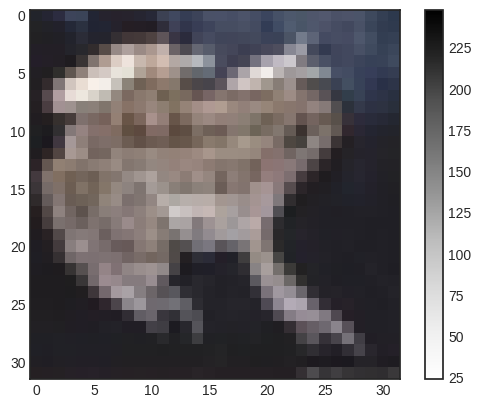

In [5]:
plt.style.use('seaborn-v0_8-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

- train, validate, test 데이터 shape 파악

In [6]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


<br>

### 데이터 전처리
- 32 x 32 x 3 ➡️ 3072로 reshape

In [7]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형
x_train = x_train.reshape(-1, 3072).astype('float32')
x_val = x_val.reshape(-1, 3072).astype('float32')
x_test = x_test.reshape(-1, 3072).astype('float32')

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


- 스케일링 : 0 ~ 255 ➡️ 0 ~ 1

In [8]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

<br>

# 모델 구성 및 컴파일
- BatchNormalization, Dropout 적용(오버피팅 방지)
  - 드롭아웃은 50%로 설정
- 10개 이미지 분류

In [10]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
model = models.Sequential()

# 첫 번째 layer
model.add(layers.Dense(512, activation='relu', input_shape=(3072,)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

# 두 번째 layer
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

# 세 번째 layer
model.add(layers.Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,845,258 (7.04 MB)

 Trainable params: 1,843,210 (7.03 MB)

 Non-trainable params: 2,048 (8.00 KB)

- 모델 형태 확인
  - 코랩에서는 바로 확인할 수 없어, 저장하여 다시 로드

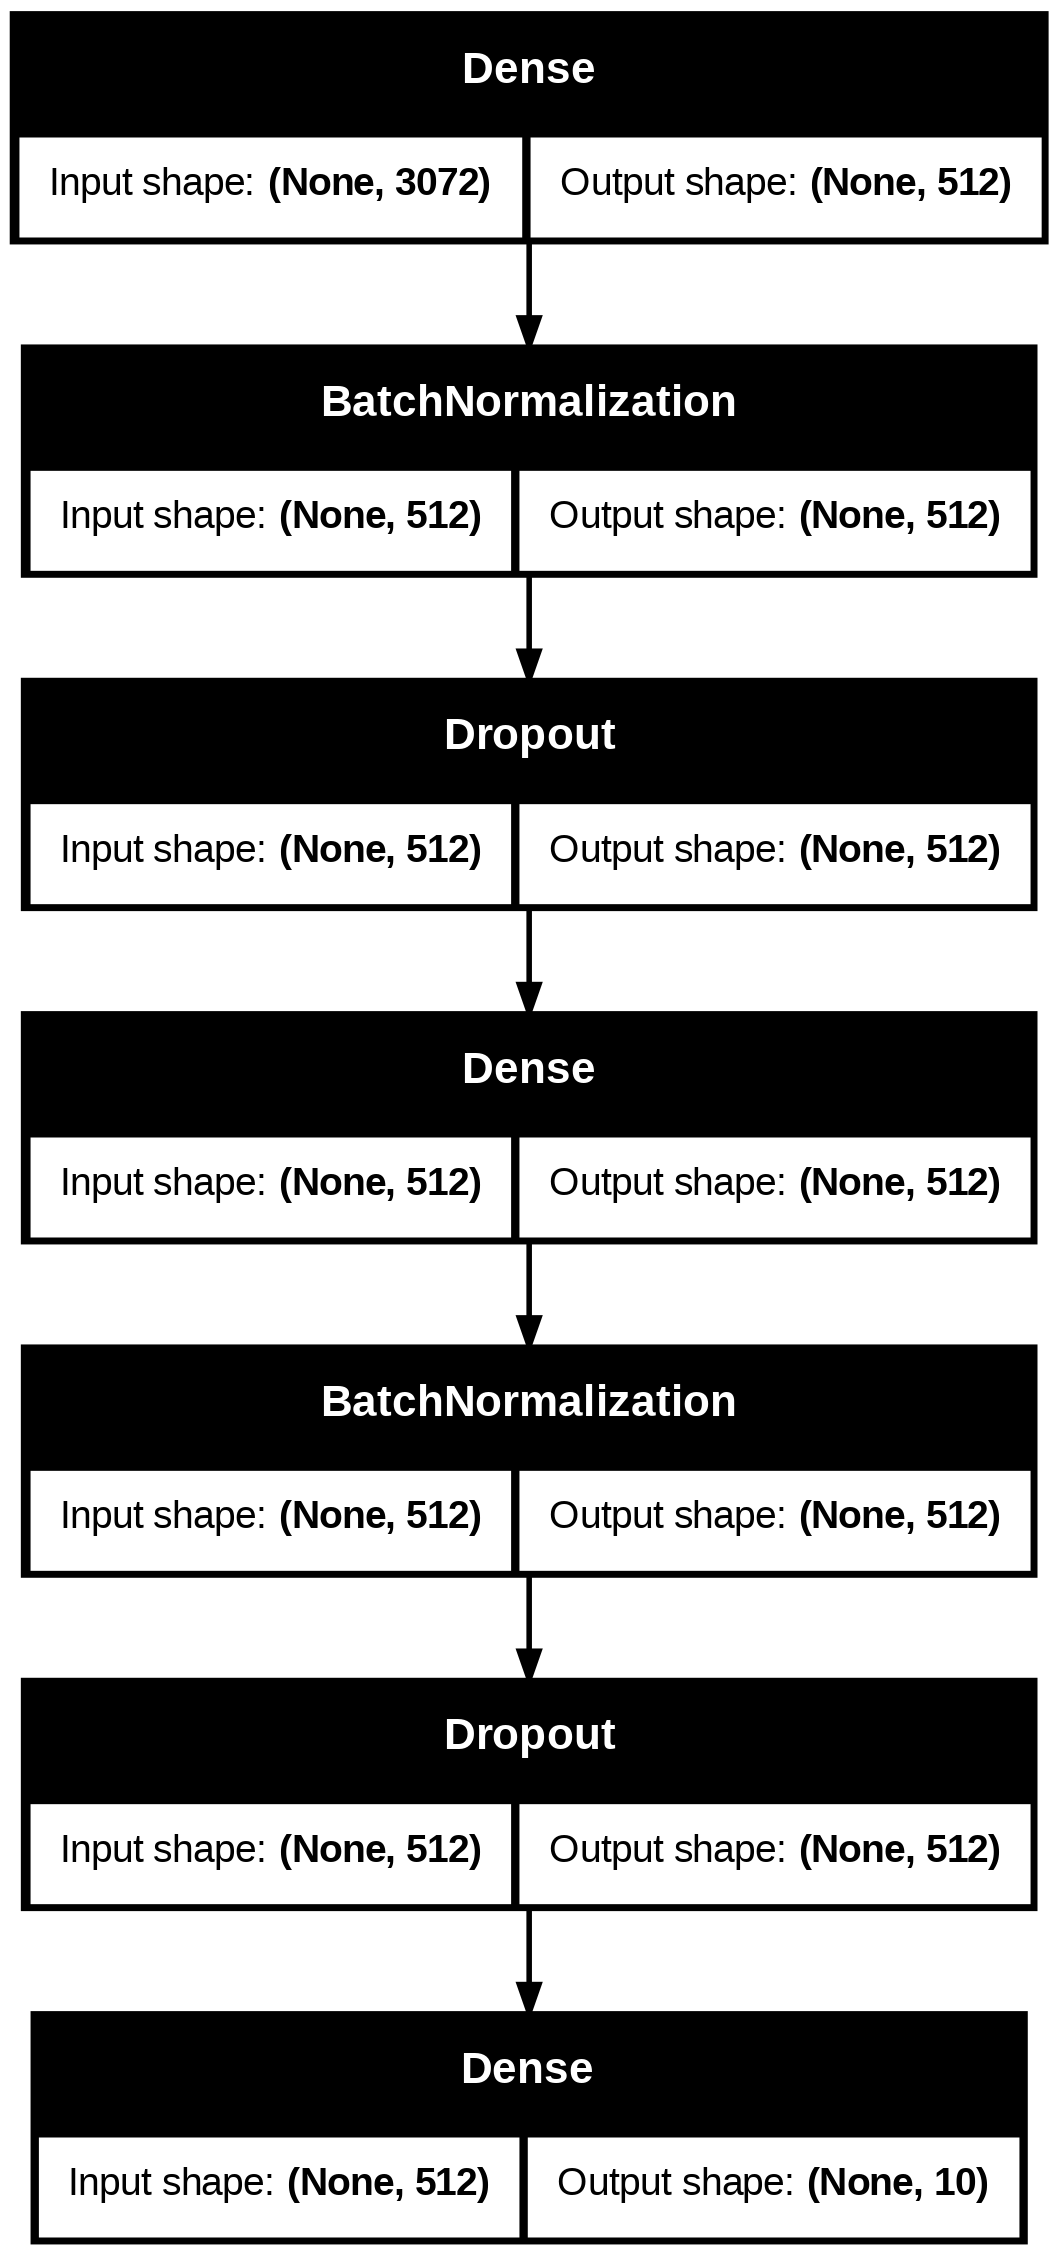

In [22]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

plot_model(model, to_file='model.png', show_shapes=True)

Image('model.png')

<br>

# 모델 학습

### ModelCheckpoint

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_cb = ModelCheckpoint('best_model.h5.keras',
                                save_best_only=True,
                                monitor='val_loss',
                                mode='min',
                                verbose=1)

### EarlyStopping
- patience를 5로 설정(에폭이 5번 반복할동안 성능 개선이 없으면 바로 종료)
- 최적 가중치 복원 설정

In [24]:
early_stopping_cb = EarlyStopping(monitor='val_loss',
                                  patience=5,
                                  restore_best_weights=True,
                                  verbose=1)

### 모델 학습

In [25]:
history = model.fit(
    x_train, y_train,
    epochs=60,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2436 - loss: 2.5053
Epoch 1: val_loss improved from inf to 1.79014, saving model to best_model.h5.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 43ms/step - accuracy: 0.2436 - loss: 2.5049 - val_accuracy: 0.3637 - val_loss: 1.7901
Epoch 2/60
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3447 - loss: 1.8635
Epoch 2: val_loss did not improve from 1.79014
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 32ms/step - accuracy: 0.3447 - loss: 1.8634 - val_accuracy: 0.3492 - val_loss: 1.7952
Epoch 3/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3623 - loss: 1.7920
Epoch 3: val_loss improved from 1.79014 to 1.77400, saving model to best_model.h5.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.3623 - loss: 1.7920 - val_accuracy: 0.3491 - val_loss: 1.7740
Epoch 4/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3696 - loss: 1.7639
Epoch 4: val_loss improved from 1.77400 to 1.67810, saving model to best_mod

<br>

- 결과 시각화

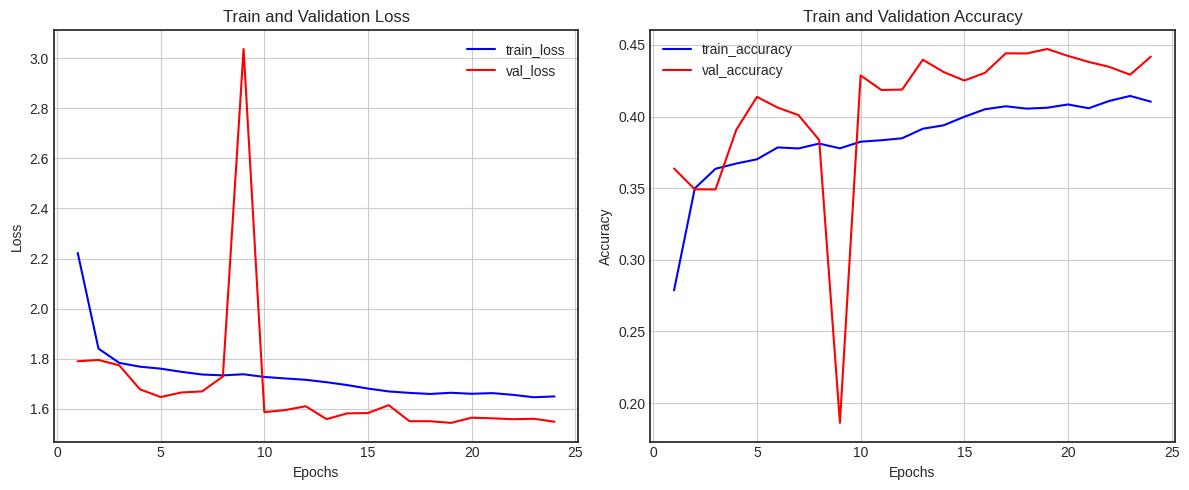

In [26]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화
# 학습 히스토리에서 loss, val_loss, accuracy, val_accuracy 가져오기
plt.style.use('seaborn-v0_8-white')

# 학습 히스토리에서 loss, val_loss, accuracy, val_accuracy 추출
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

# 그래프 출력
plt.tight_layout()
plt.show()

- 결과 분석
  - 같은 지점에서 크게 튀는 현상 발생
    - 데이터 노이즈 의심

- 참고) LMS에서의 시각화 결과(커널 중지로 인해 다시 실행한 결과입니다..)

<img width="591" alt="image" src="https://github.com/user-attachments/assets/ad22dc03-f097-4f81-a246-75d6d7c247ec" />

<br>

# 모델 평가 및 예측
- Test loss : 1.5267853736877441
- Test accuracy : 0.45419999957084656

In [27]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4543 - loss: 1.5244


[1.5267853736877441, 0.45419999957084656]

<br>

# 추가 : 시각화
- 이미지 데이터를 3072로 폈기 때문에, 다시 원형태로 돌려야 확인 가능

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


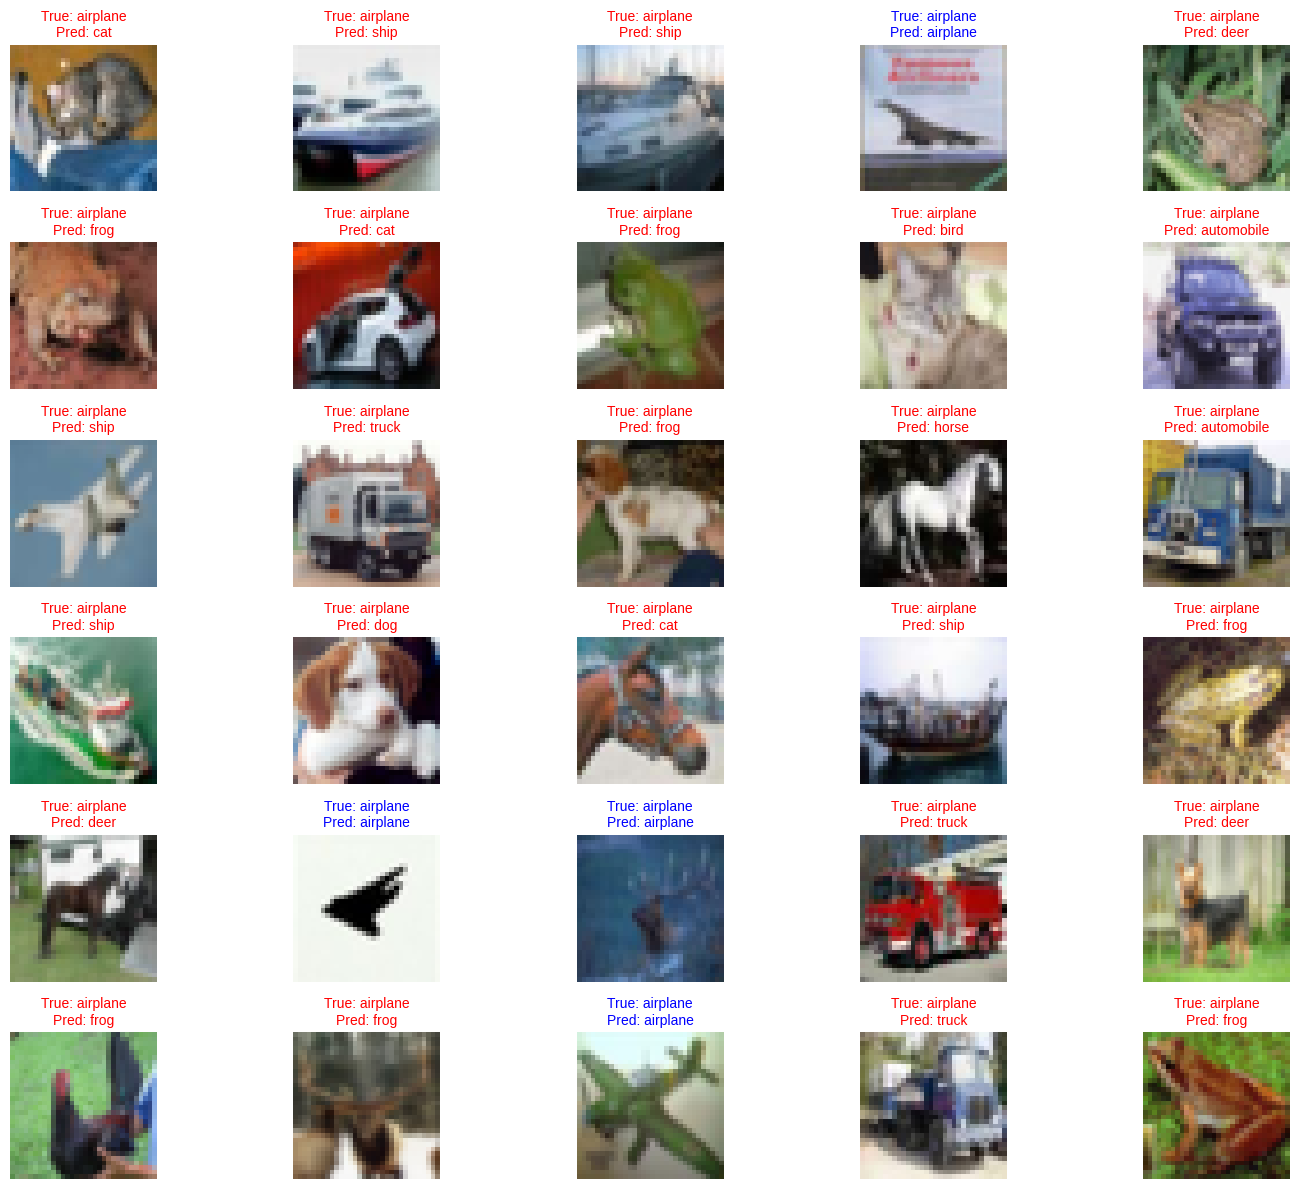

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# 모델 예측
y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis=1)

# 실제 레이블
y_true = np.argmax(y_test, axis=1)

num_samples = 30

plt.figure(figsize=(15, 12))

for i in range(num_samples):
    plt.subplot(6, 5, i+1)
    img = x_test[i].reshape(32, 32, 3)
    plt.imshow(img)

    if y_true[i] == y_pred_class[i]:
        color = 'blue'
    else:
        color = 'red'

    title = f"True: {class_names[y_true[i]]}\nPred: {class_names[y_pred_class[i]]}"
    title_obj = plt.title(title, fontsize=10)
    title_obj.set_color(color)

    plt.axis('off')

plt.tight_layout()
plt.show()

# 결과 분석
- 이미지 데이터의 경우에는, CNN 게열의 모델을 사용해야 조금 더 명확하게 잘 나옴.

<br>

# 회고
이번에는 이미지 데이터를 활용해서 예측 모델을 생성하고 학습하여 그 결과를 확인해봤습니다.
<br>
사실 CNN 게열 모델을 사용하지 않아, 정확도가 많이 떨어질 것이라는 예상은 했으나 생각한 것보다도 더 낮게 나와서 조금 당황했지만...LMS와 달리 Colab에서는 우선 train과 validate 모두 같은 구간에서 특이하게 튀는 부분이 발견되어서 원인을 분석해봤습니다.
<br>
명시적으로는 이상치나 결측치가 있다고 나와있지는 않지만, 일부 픽셀 오류 또는 잘못된 라벨링 정보가 있는 것이 아닐까 미루어 짐작해봤어요..!
<br>
(물론 아닐 가능성이 99% 이상이지만..)
- 데이터 노이즈
  - 이상치 제거가 잘 안되었거나 오버피팅되었을 가능성도 배제할 수는 없음

<br>

그리고 또 한 가지 특이한 점은 LMS 내부에서의 모델 학습 부분과 코랩에서의 모델 학습 부분이 극명하게 차이가 났다는 점입니다.
<br>
- LMS(30%정도에서 마무리되었었으나 커널 중지로 인해 캡쳐를 못했고, 다시 실행하니 40%대로 올라갔습니다)
<img width="560" alt="image" src="https://github.com/user-attachments/assets/515128a2-6e9e-4858-8eab-99ced1fe6fc1" />

- Colab
<img width="962" alt="image" src="https://github.com/user-attachments/assets/3d98f9ad-346f-430f-9578-818204aab7ad" />


<br>

이러한 부분들이 있어 조금은 물음표가 남는 프로젝트였지만, 다음에는 CNN 계열의 모델로 다시 진행해보고 싶어요!

